In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C


In [3]:
# Getting broad overview of the data

train_data.info()
print('\n\n\n')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB




<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null f

In [4]:
# Total number null values in each column

train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
# percentage of null values in cabin of training data

print((train_data['Cabin'].isnull().sum()/len(train_data['Cabin']))*100)

77.1043771044


Since almost 70% data is missing we will simply remove Cabin column.

Intuitively speaking passenger boarding port should not affect the survival chance.So we will remove embarked also.

In [7]:
# Total number of null values in age

pd.isnull(train_data['Age']).sum()

177

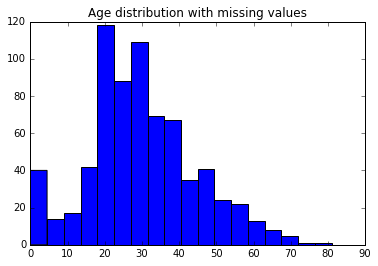

In [8]:
# Distribution of age 

plt.hist(train_data['Age'],bins = 20, range = (0,90))
plt.title('Age distribution with missing values')
plt.show()

In [9]:
# Filling all the missing values in age column with median age

train_data['Age'].fillna(train_data['Age'].median(), inplace = True)
test_data['Age'].fillna(test_data['Age'].median(), inplace = True)

# Conferming if any null in age

train_data['Age'].isnull().sum()

0

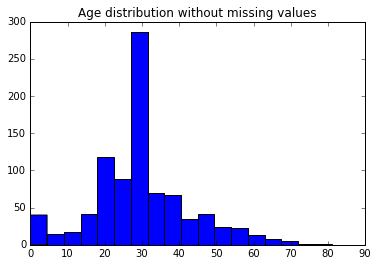

In [10]:
# Age distribution after adjusting the column with median age 

plt.hist(train_data['Age'], bins = 20, range = (0,90))
plt.title('Age distribution without missing values')
plt.show()

In [11]:
# How many passenger have survived

# total_passenge is number of passenger in training data set

total_passenger = train_data['Survived'].count()

# survived_passenger is the count of passenger who have survived in training data set
# since the code for survival is 1 ,its sum will give the required number

survived_passenger = train_data['Survived'].sum()

# percentage of passengers survived

percentage_survived = (survived_passenger/total_passenger)
print('percentage survival : ', str(percentage_survived*100))

percentage survival :  38.3838383838


# Now we need to see the impact of each columns for survival.

1. Pclass vs Survived
2. Sex vs Survived
3. Age vs Survived
4. Family size(sip + parch + 1) vs Survived
5. Fair vs Survied


In [12]:
# Pclass vs Survived 

groupby_Pclass = train_data[['Survived',  'Pclass']].groupby(['Pclass'], as_index = False)
print(groupby_Pclass.mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


Class 1 passenger have very high chance of survival as compared to others.

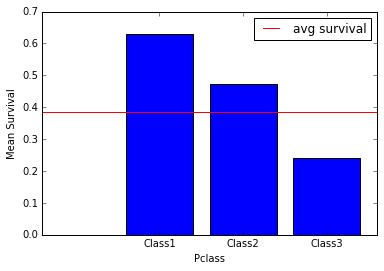

In [13]:
# Creating a bar chart to see the avg survival across Pclass

y1 = groupby_Pclass['Survived'].get_group(1).mean()
y2 = groupby_Pclass['Survived'].get_group(2).mean()
y3 = groupby_Pclass['Survived'].get_group(3).mean()

x = [1,2,3]
y = [y1, y2, y3]

plt.bar(x,y)
plt.xticks([1.4, 2.4, 3.4], ['Class1', 'Class2', 'Class3'])
plt.ylabel('Mean Survival')
plt.xlabel('Pclass')

plt.plot((0,4), (percentage_survived,percentage_survived), color = 'red', label = 'avg survival')

plt.legend()

#plt.title('Surviveal mean agains Pclass')
plt.show()

In [14]:
# sex vs Survived

groupby_sex = train_data[['Survived', 'Sex']].groupby(['Sex'], as_index = False)
print(groupby_sex.mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


It is very clear womens have way more chance of survival because of womens and child first policy during rescue.

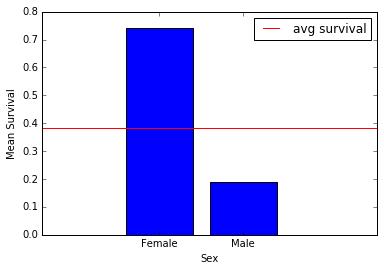

In [15]:
#Plotting bar chart for avg survival as per sex

y1 = groupby_sex['Survived'].get_group('female').mean()
y2 = groupby_sex['Survived'].get_group('male').mean()

x = [1,2]
y = [y1, y2]

plt.bar(x,y)
plt.xticks([1.4, 2.4,], ['Female', 'Male'])
plt.ylabel('Mean Survival')
plt.xlabel('Sex')

plt.plot((0,4), (percentage_survived,percentage_survived), color = 'red', label = 'avg survival')

plt.legend()

#plt.title('Surviveal mean agains sex')
plt.show()

In [16]:
# Age vs Survived 

groupby_age = train_data[['Survived', 'Age']].groupby(['Survived'], as_index = False)

This will divide the age in two groups.
one which has only that passenger who survived
and another which has passenger who couldn't survive.

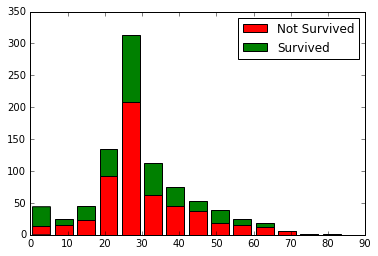

In [17]:
# Stacked histogram 

x1 = groupby_age['Age'].get_group(0)
x2 = groupby_age['Age'].get_group(1)
plt.hist([x1,x2], stacked = True, bins = 15, range = (0,90), label = ['Not Survived', 'Survived'], color = ['red', 'green'])
plt.legend()

plt.show()

# Classification according to age

Next we are going to categorize Age in differnt custom groups

1. 0 - 16 Kid **code 0**
2. 16 - 35 Young **code 1**
3. 35 - 60 Adult **code 2**
4. 60 above Old **code 3**

In [18]:
#bins = [0, 16, 35, 60, 90]
#group_names = ['Kid', 'Young' ,'Adult', 'Old']
age_bins = [0, 16, 35, 60, 90]
age_group = [0, 1, 2, 3]
train_data['Age_group'] = pd.cut(train_data['Age'], age_bins, labels=age_group)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1


In [19]:
grouped_age = train_data[['Survived', 'Age_group']].groupby(['Age_group'])
grouped_age['Survived'].mean()

Age_group
0    0.550000
1    0.355401
2    0.400000
3    0.227273
Name: Survived, dtype: float64

Age when grouped gives clear insight that kid have highest chance of survival and person with age more than 60 is not likely to survive the disaster.

In [20]:
# Family size vs Survived

# we are going to crate a column named family size in data

train_data['Family_Size'] = train_data['Parch'] + train_data['SibSp'] + 1

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1,1


In [21]:
groupby_family = train_data[['Survived', 'Family_Size']].groupby(['Family_Size'], as_index = False)
groupby_family['Survived'].mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


Larger families having more than 5 members have little chance of survival

# Grouping by family size

1. Alone = 1                             **Coded as 0**

2. Small = 2 - 4                         **Coded as 1**

3. big = 5 or more                       **Coded as 2**

In [22]:
#bins = [0, 1, 4, 11]
#group_names = ['Alone','Small','Big']

family_bins = [0, 1, 4, 11]
family_group = [0, 1, 2]
train_data['Family_group'] = pd.cut(train_data['Family_Size'], family_bins, labels=family_group)
train_data['Family_group'].astype(int)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Family_Size,Family_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,2,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1,1,0


In [23]:
grouped_family = train_data[['Survived','Family_group']].groupby(['Family_group'])
grouped_family['Survived'].mean()

Family_group
0    0.303538
1    0.578767
2    0.161290
Name: Survived, dtype: float64

In [24]:
# Fair vs Survived

groupby_fare = train_data[['Survived', 'Fare']].groupby(['Survived'])
train_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

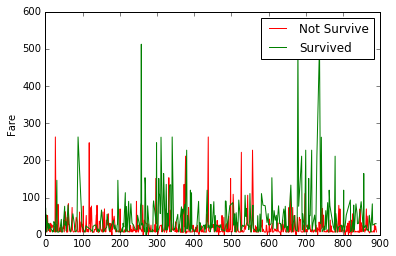

In [25]:
y1 = groupby_fare['Fare'].get_group(0)
y2 = groupby_fare['Fare'].get_group(1)

# Plot of fare of people who didn't survive
plt.plot(y1, color = 'red', label = 'Not Survive')

#plot of Fare of people who survived
plt.plot(y2, color = 'green', label = 'Survived')
plt.ylabel('Fare')
plt.legend()
plt.show()

Details are not clear from this graph,but we can safely conclude that passengers who paid more than 200$ have pretty good chance 

In [26]:
# Lets dig dipper

train_data['Quartile_fare'] = pd.qcut(train_data['Fare'], 4)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Family_Size,Family_group,Quartile_fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,2,1,"[0, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,2,2,1,"(31, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,2,1,"(31, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1,1,0,"(7.91, 14.454]"


It grouped data according to the quartiles

In [27]:
groupby_quartile = train_data[['Survived', 'Quartile_fare']].groupby(['Quartile_fare'], as_index = False)
groupby_quartile.mean()

,Quartile_fare,Survived
0,"[0, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31]",0.454955
3,"(31, 512.329]",0.581081


In [28]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Family_Size,Family_group,Quartile_fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1,2,1,"[0, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,2,2,1,"(31, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,0,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,2,1,"(31, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,1,1,0,"(7.91, 14.454]"


In [29]:
train_data.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
Age_group          0
Family_Size        0
Family_group       0
Quartile_fare      0
dtype: int64

Now its clear that survival indeed depends on the amount paid for ticket.But the ticket price should very also according to Pclass.

Now its not clear whether we should keep fare and Pclass both since they both are related somehow.According to wikipedia fare for evey class is as follows
1. First Class = 30 pounds - 870 pounds
2. Second Class = Avg fare 13 pounds
3. Third Class = Avg fare 7 pounds


It is clear from the wikipedia inforamation that there is a huge variation in first class fair so we decided to keep quartile_fare

## Feature engineering

Dropping all the unncessary columns

In [30]:
drop_columns = ['PassengerId', 'Name', 'Age', 'Parch', 'SibSp', 'Ticket', 'Cabin', 'Embarked', 'Family_Size', 'Quartile_fare']
train_data.drop(drop_columns, axis = 1,inplace = True)

In [31]:
train_data.head()

,Survived,Pclass,Sex,Fare,Age_group,Family_group
0,0,3,male,7.2500,1,1
1,1,1,female,71.2833,2,1
2,1,3,female,7.9250,1,0
3,1,1,female,53.1000,1,1
4,0,3,male,8.0500,1,0


# Creating dummy variables

In [32]:
# Mapping Sex
train_data['Sex'] = train_data['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

# Mapping Fare
train_data.loc[ train_data['Fare'] <= 7.91, 'Fare'] = 0
train_data.loc[(train_data['Fare'] > 7.91) & (train_data['Fare'] <= 14.454), 'Fare'] = 1
train_data.loc[(train_data['Fare'] > 14.454) & (train_data['Fare'] <= 31), 'Fare']   = 2
train_data.loc[ train_data['Fare'] > 31, 'Fare']  = 3
train_data['Fare'] = train_data['Fare'].astype(int)

train_data.head()

,Survived,Pclass,Sex,Fare,Age_group,Family_group
0,0,3,1,0,1,1
1,1,1,0,3,2,1
2,1,3,0,1,1,0
3,1,1,0,3,1,1
4,0,3,1,1,1,0


In [33]:
train_data.isnull().sum()

Survived        0
Pclass          0
Sex             0
Fare            0
Age_group       0
Family_group    0
dtype: int64

#  Now we will go through exact same transformation for test data

In [34]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [35]:
# Filling missing fare

test_data['Fare'].fillna(test_data['Fare'].mean(), inplace = True)
test_data['Fare'].isnull().sum()

0

In [36]:
# With our experience we already know which columns need to be added as which one are going to be removed

# Creating Age_group column
test_data['Age_group'] = pd.cut(test_data['Age'], age_bins, labels=age_group)
test_data['Age_group'].astype(int)

# Creating Family_Size column
test_data['Family_Size'] = test_data['Parch'] + test_data['SibSp'] + 1

# Creating Family_group column
test_data['Family_group'] = pd.cut(test_data['Family_Size'], family_bins, labels=family_group)
test_data['Family_group'].astype(int)

# Mapping Sex
test_data['Sex'] = test_data['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

# Mapping Fare
test_data.loc[ test_data['Fare'] <= 7.91, 'Fare'] = 0
test_data.loc[(test_data['Fare'] > 7.91) & (test_data['Fare'] <= 14.454), 'Fare'] = 1
test_data.loc[(test_data['Fare'] > 14.454) & (test_data['Fare'] <= 31), 'Fare']   = 2
test_data.loc[ test_data['Fare'] > 31, 'Fare']  = 3
test_data['Fare'] = test_data['Fare'].astype(int)


# Dropping columns
drop_column = ['Name', 'Age', 'Parch', 'SibSp', 'Ticket', 'Cabin', 'Embarked', 'Family_Size']
test_data.drop(drop_column, axis = 1,inplace = True)


In [37]:
test_data.head()

,PassengerId,Pclass,Sex,Fare,Age_group,Family_group
0,892,3,1,0,1,0
1,893,3,0,0,2,1
2,894,2,1,1,3,0
3,895,3,1,1,1,0
4,896,3,0,1,1,1


In [38]:
test_data.isnull().sum()

PassengerId     0
Pclass          0
Sex             0
Fare            0
Age_group       0
Family_group    0
dtype: int64

# Machine Learning


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

In [40]:
# define training and testing sets

X_train = train_data.drop("Survived",axis=1)
Y_train = train_data["Survived"]
X_test  = test_data.drop("PassengerId",axis=1)

In [41]:
X_train.shape

(891, 5)

In [42]:
Y_train.shape

(891,)

In [43]:
X_test.shape

(418, 5)

In [44]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

0.85072951739618408

In [45]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic.csv', index=False)